In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import datetime

import import_ipynb
import market_generator

import sys
sys.path.insert(0, "../src")

sys.path.insert(0, 'C:/Users/dorot/Documents/Thesis/Code/Data')
import modularized_dataeval as eval

importing Jupyter notebook from market_generator.ipynb
importing Jupyter notebook from cvae.ipynb


In [2]:
import importlib
importlib.reload(market_generator)

importing Jupyter notebook from market_generator.ipynb


<module 'market_generator' from 'market_generator.ipynb'>

In [4]:
# ^GSPC is S&P 500.
ticker = "^GSPC"
MG = market_generator.MarketGenerator(ticker, start=datetime.date(2000, 1, 1),
                                      freq="W", sig_order=None)

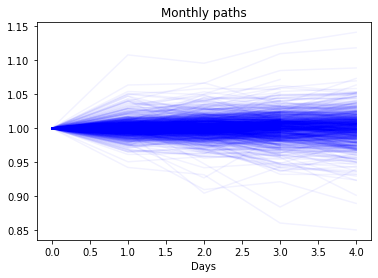

In [5]:
for path in MG.windows:
    returns = path[::2, 1] / path[0, 1]
    plt.plot(returns, "b", alpha=0.05)

plt.title("Monthly paths")
plt.xlabel("Days")
plt.show()

In [6]:
MG.train(n_epochs=10000)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
generated = np.array([MG.generate(cond) for cond in MG.conditions])

In [8]:
generated_logreturn = generated.flatten()

In [9]:
original_logreturn = MG.orig_logsig.flatten()

In [10]:
eval.get_basic_stats(generated_logreturn)

mean is:  0.00013487834
standard deviation is:  0.009020743
skew is:  -0.14445696771144867
kurtosis is:  1.9086910203812222


(0.00013487834, 0.009020743, -0.14445696771144867, 1.9086910203812222)

In [11]:
eval.get_basic_stats(original_logreturn)

mean is:  0.00013570731041317796
standard deviation is:  0.011850298766416295
skew is:  -0.23395064037371294
kurtosis is:  7.1319367230709485


(0.00013570731041317796,
 0.011850298766416295,
 -0.23395064037371294,
 7.1319367230709485)

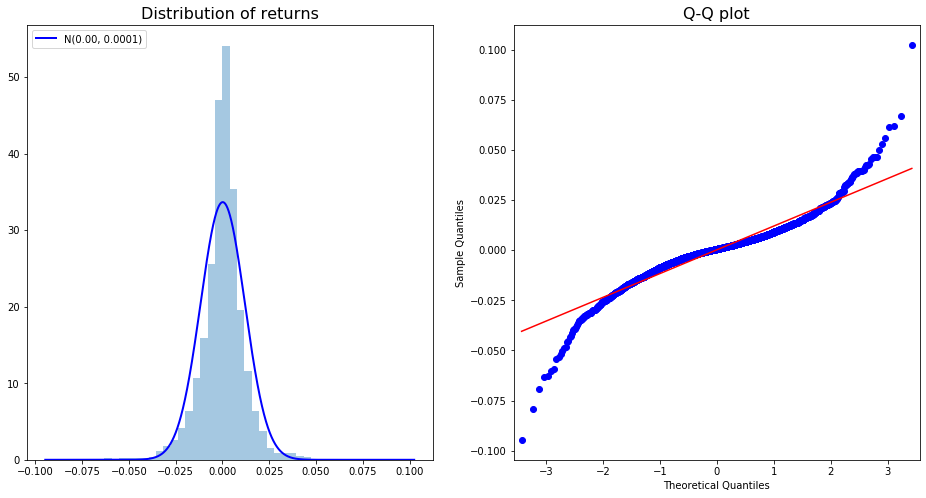

In [12]:
eval.plot_hist_qq(original_logreturn)

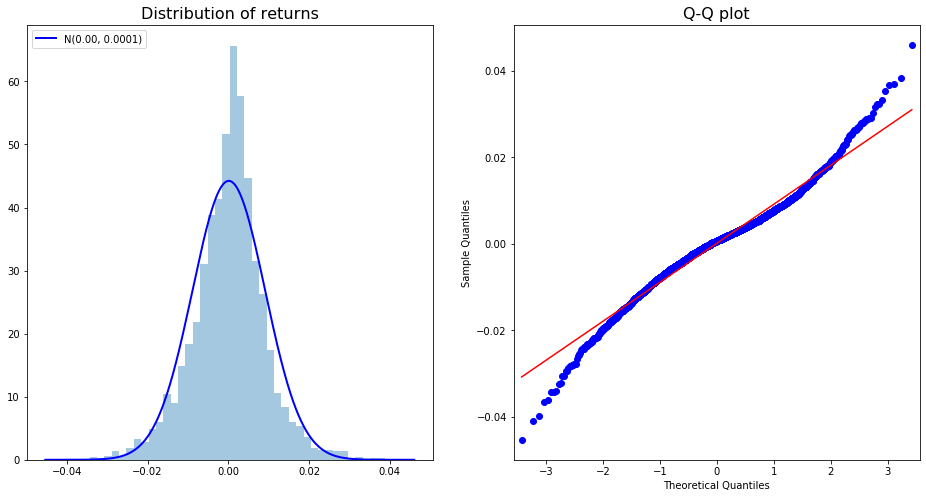

In [13]:
eval.plot_hist_qq(generated_logreturn)

In [14]:
eval.ks_2samp(original_logreturn, generated_logreturn)

Ks_2sampResult(statistic=0.039544094861943276, pvalue=1.0)

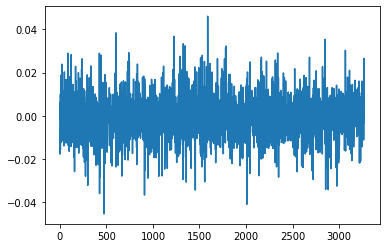

In [15]:
eval.plot_volclusters(generated_logreturn)